# Project Proposal
# Inference of median house prices of districts in California based on house and district qualities

By group 4 - Tianne Lee, Sid Ahuja, William Ho, Weihao Sun

## Introduction

The housing market is dependent on several microeconomic and macroeconomic variables. Individual house prices are often reflective of the spatial and socioeconomic characteristics of the neighborhood in which the house resides (Stadelmann, 2010). While generating a regression model may be a robust technique to make estimates and inferences regarding house prices, many aspects of spatial elements need to be taken into consideration before doing so (Kelley Pace & Barry, 1997). Using a housing dataset, we want to explore which qualities and characteristics of houses within a district are best to include in a regression model, helping us understand the relationship between house prices and the determined set of input variables for the population. To create a better understanding towards the topic, we ask the following question: </br>

**What combination of house and district qualities best estimate their relationship to the median house prices in a district and are those qualities significantly associated with the median house price of the district?** </br>

In order to explore this question and the relation between median housing prices and different qualities of houses in a district, we will be using a [modified version of the California Housing dataset](https://raw.githubusercontent.com/ageron/handson-ml/master/datasets/housing/housing.csv). This dataset is about houses found in given California block groups based on the 1990 census data. Each observation in the dataset corresponds to a block group, the smallest geographical unit for which the U.S. Census Bureau publishes sample data (Aurélien Géron, 2017). In our project, we will use the words “block group” and “district” interchangeably. 

The qualities (explanatory variables) that we would like to explore include:

|Attribute|Variable|Description|
|:---:|:---:|:---:|
|Continuous|Longitude|Longitude of the district|
|Continuous|Latitude|Latitude of the district|
|Continuous|Housing_median_age|Median housing age of the district|
|Continuous|Total_rooms|Total rooms in the district|
|Continuous|Total_bedrooms|Total bedrooms in the district|
|Continuous|Population|Total population in the district|
|Continuous|Households|Total households in the district|
|Continuous|Median_income|Median income of the district|
|Categorical|Ocean_proximity|Distance to the ocean, with categories:</br> <1H OCEAN, INLAND, NEAR OCEAN, NEAR BAY, ISLAND|


## Preliminary Results

In [1]:
library(tidyverse)
library(GGally)
library(psych)

-- Attaching packages --------------------------------------- tidyverse 1.3.1 --

v ggplot2 3.3.5     v purrr   0.3.4
v tibble  3.1.6     v dplyr   1.0.8
v tidyr   1.2.0     v stringr 1.4.0
v readr   2.1.2     v forcats 0.5.1

-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()

Registered S3 method overwritten by 'GGally':
  method from   
  +.gg   ggplot2


Attaching package: 'psych'


The following objects are masked from 'package:ggplot2':

    %+%, alpha




Firstly, we download the data from the web and save it to the repository. As we are taking into account all the data in the dataset, we will also drop all invalid columns, so we don't make inferences based on incomplete information. After removing the missing values, we can then take a glimpse of the head of the dataset.

In [2]:
data <- read.csv("https://raw.githubusercontent.com/ageron/handson-ml/master/datasets/housing/housing.csv")
write.csv(data,"house_data.csv", row.names = FALSE)
data <- data %>% drop_na()
head(data)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
1,-122.23,37.88,41,880,129,322,126,8.3252,452600,NEAR BAY
2,-122.22,37.86,21,7099,1106,2401,1138,8.3014,358500,NEAR BAY
3,-122.24,37.85,52,1467,190,496,177,7.2574,352100,NEAR BAY
4,-122.25,37.85,52,1274,235,558,219,5.6431,341300,NEAR BAY
5,-122.25,37.85,52,1627,280,565,259,3.8462,342200,NEAR BAY
6,-122.25,37.85,52,919,213,413,193,4.0368,269700,NEAR BAY


There are 10 columns in the dataset, and we will treat `median_house_value` as the response variable. The data is already clean and tidy, so we can perform analysis on this dataset without concern.

As our data is focused on the median house value, it would be reasonable to convert the total numbers into averages instead. Using a total to predict or infer a median could potentially be less reliable compared to using another form of average.

In [3]:
data <- data %>% mutate(rooms_per_household = total_rooms/households,
                       bedrooms_per_household = total_bedrooms/households,
                       population_per_household = population/households)
data <- data %>% relocate(median_house_value, .after = last_col())
head(data)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,rooms_per_household,bedrooms_per_household,population_per_household,median_house_value
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
1,-122.23,37.88,41,880,129,322,126,8.3252,NEAR BAY,6.984127,1.0238095,2.555556,452600
2,-122.22,37.86,21,7099,1106,2401,1138,8.3014,NEAR BAY,6.238137,0.9718805,2.109842,358500
3,-122.24,37.85,52,1467,190,496,177,7.2574,NEAR BAY,8.288136,1.0734463,2.802260,352100
4,-122.25,37.85,52,1274,235,558,219,5.6431,NEAR BAY,5.817352,1.0730594,2.547945,341300
5,-122.25,37.85,52,1627,280,565,259,3.8462,NEAR BAY,6.281853,1.0810811,2.181467,342200
6,-122.25,37.85,52,919,213,413,193,4.0368,NEAR BAY,4.761658,1.1036269,2.139896,269700


In [4]:
any(is.na(data))

[1] FALSE

Shown below is a summary table of the dataset that shows the relevant statistics for each variable.

In [5]:
describe(data)

,vars,n,mean,sd,median,trimmed,mad,min,max,range,skew,kurtosis,se
,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
longitude,1,20433,-119.570689,2.003578e+00,-118.490000,-119.519522,1.912554e+00,-124.3500000,-114.31000,10.04000,-0.29609742,-1.3326789,1.401652e-02
latitude,2,20433,35.633221,2.136348e+00,34.260000,35.509782,1.823598e+00,32.5400000,41.95000,9.41000,0.46486602,-1.1197263,1.494534e-02
housing_median_age,3,20433,28.633094,1.259181e+01,29.000000,28.486205,1.482600e+01,1.0000000,52.00000,51.00000,0.06159638,-0.8013262,8.808905e-02
total_rooms,4,20433,2636.504233,2.185270e+03,2127.000000,2294.132563,1.178667e+03,2.0000000,39320.00000,39318.00000,4.15820584,32.7020664,1.528759e+01
total_bedrooms,5,20433,537.870553,4.213851e+02,435.000000,471.438184,2.401812e+02,1.0000000,6445.00000,6444.00000,3.45903841,21.9774569,2.947902e+00
population,6,20433,1424.946949,1.133208e+03,1166.000000,1255.862421,6.508614e+02,3.0000000,35682.00000,35679.00000,4.95928833,74.0349321,7.927637e+00
households,7,20433,499.433465,3.822992e+02,409.000000,441.075610,2.238726e+02,1.0000000,6082.00000,6081.00000,3.41334898,22.0859277,2.674468e+00
median_income,8,20433,3.871162,1.899291e+00,3.536500,3.654762,1.578821e+00,0.4999000,15.00010,14.50020,1.64431547,4.9408607,1.328696e-02
ocean_proximity*,9,20433,2.166153,1.420135e+00,2.000000,1.957729,1.482600e+00,1.0000000,5.00000,4.00000,1.01591035,-0.4506811,9.934901e-03


We create various visualizations to give a more intuitive understanding of the data. `ocean_proximity` is a categorical variable, so we generate a barplot for it. 

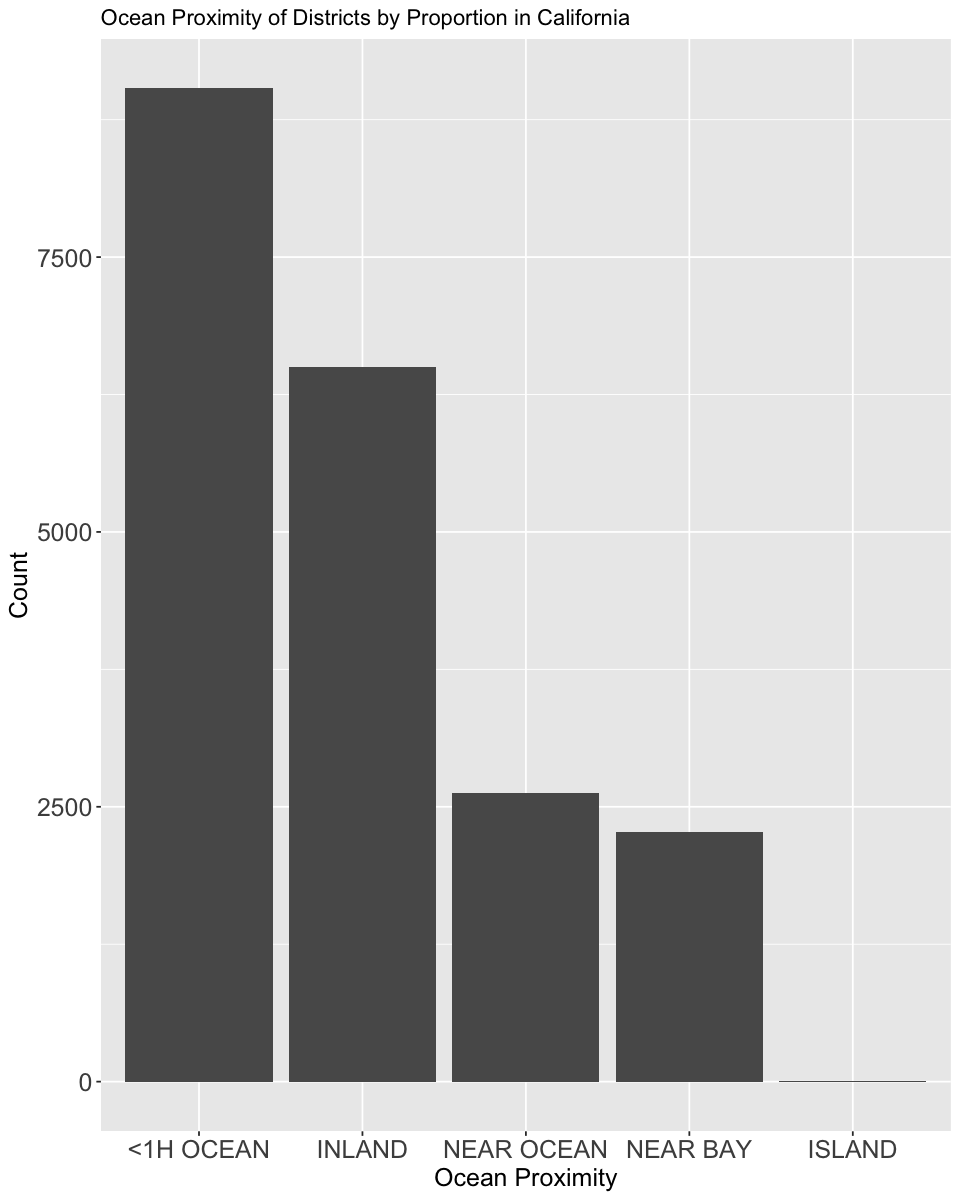

In [6]:
options(repr.plot.width=8, repr.plot.height=10)
ggplot(data, aes(x = reorder(ocean_proximity, ocean_proximity, function(x)-length(x)))) + 
    geom_bar(stat = "count") + 
    labs(title = "Ocean Proximity of Districts by Proportion in California", x = "Ocean Proximity", y = "Count") + 
    theme(axis.text = element_text(size = 15),
         axis.title.x = element_text(size = 15),
         axis.title.y = element_text(size = 15)) 

Via the barplot, the majority of people live <1 hour away from the ocean. Considering that the most populated cities (Los Angeles, San Diego, San Jose) are not far from the ocean, this would be a reasonable result.

The rest of the variables are continuous. We generate a scatter plot matrix to find possible patterns between each of them and the response variable.

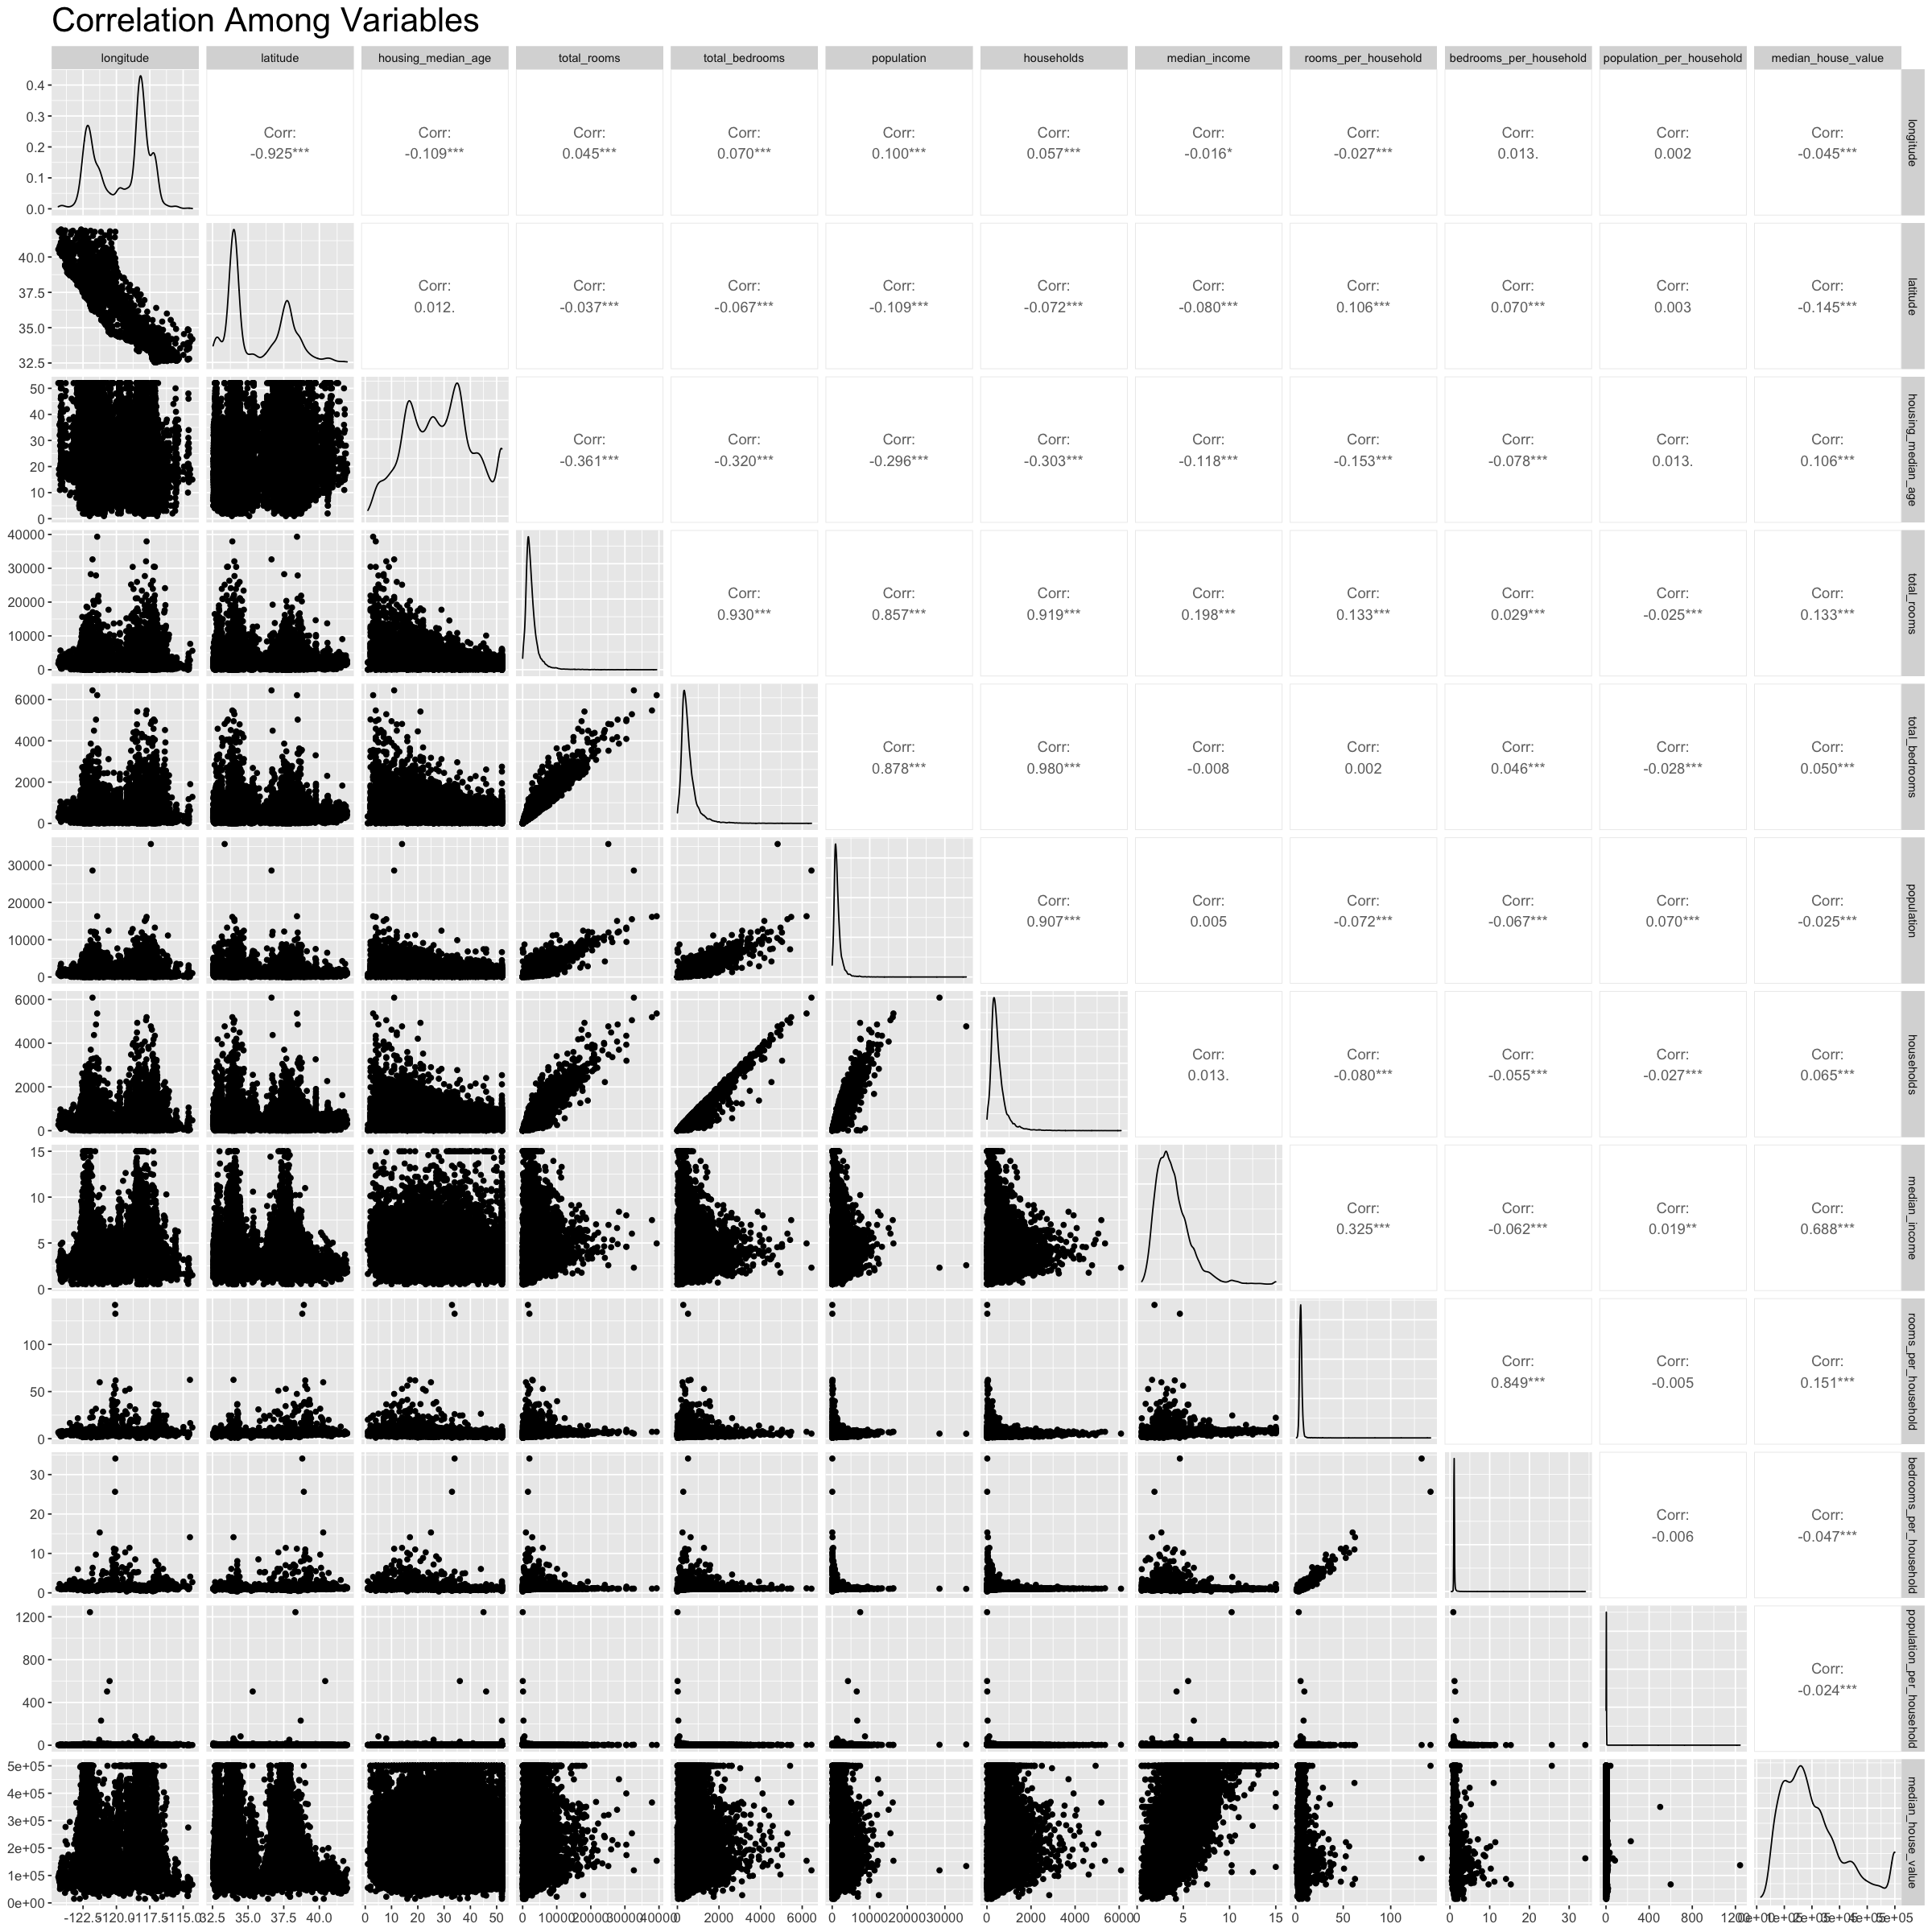

In [7]:
options(repr.plot.width=20, repr.plot.height=20)
data_pairs <- data %>% select(!"ocean_proximity")
ggpairs(data_pairs, title = "Correlation Among Variables") + 
    theme(axis.text = element_text(size = 10),
         plot.title = element_text(size = 25))

Upon initial inspection, `median_income` has the biggest correlation with `median_house_value`. People who earn more money tend to be able to afford more expensive houses. Additionally, we can see that many (potential) input variables are correlated with each other. We will take this into consideration when generating a model.

## Method: Plan

This data comes from a census conducted by the U.S. Census Bureau. Using this large sample and proper statistical inference methods, estimate models, test the hypotheses, and come to a conclusion with a high degree of reliability and credibility. Generated models will be evaluated (Adjusted R2, F-test, etc.) to ensure that estimates are accurate and describe the data well. </br>

To explore the relationship between `median_house_price` and the input variables, we begin by splitting the dataset. One subset will be used to select the relevant input variables (determined by comparing the adjusted R2 values) and the other subset will be used to build and evaluate the generated model. We will also check that the model assumptions are met, that all confounding variables are accounted for, and input variables do not have high multicollinearity. From our final model, hypothesis testing will be conducted to assess whether input variables are statistically associated with the median house price of a district. Furthermore, confidence intervals will allow us to measure the uncertainty of our estimate. </br>

We hope that through our inferential analysis, we are able to make accurate claims about what factors impact and are associated with house price. We also hope to learn and improve upon our skills involving generative regression models. </br>


## References

Aurélien Géron (2017). Hands-On Machine Learning with Scikit-Learn and TensorFlow: Concepts, Tools, and Techniques to Build Intelligent Systems, 1st Edition. https://github.com/ageron/handson-ml/tree/master/datasets/housing

Kelley Pace, R., & Barry, R. (1997). Sparse spatial autoregressions. Statistics & Probability Letters, 33(3), 291–297. https://doi.org/10.1016/s0167-7152(96)00140-x 

Stadelmann, D. (2010). Which factors capitalize into house prices? A Bayesian averaging approach. Journal of Housing Economics, 19(3), 180–204. https://doi.org/10.1016/j.jhe.2010.07.002 
